In [56]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

In [57]:
instances = []
instance = {}

type = "ellipsoide separable/ellipsoide separable"
name = "Borg Adaptative"

# Read the data
with open("./Data/bbob-biobj_f11_d02_hyp.tdat", "r") as file:
    for line in file:
        if line[0] == "%" and instance:
            instances.append(instance)
            instance = {}
        if line[0] == "%":
            continue
        line = line.split()
        instance[int(line[0])] = float(line[1])
    instances.append(instance)

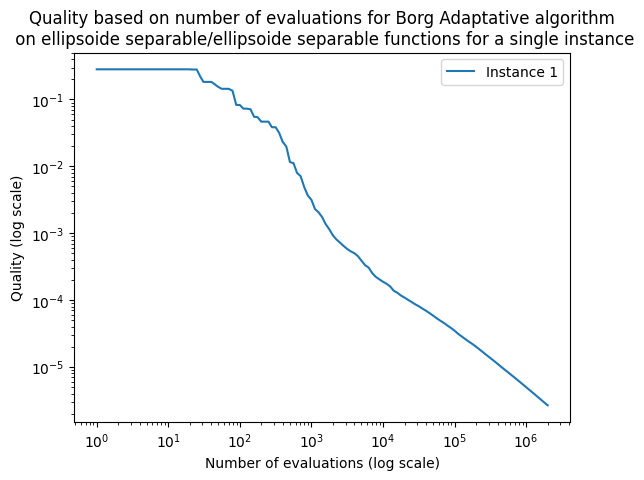

In [58]:
# Plot one instance
fig, ax = plt.subplots()
ax.set_title("Quality based on number of evaluations for " + name + " algorithm\n on " + type + " functions for a single instance")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(instances[0].keys()), list(instances[0].values()), label=f"Instance 1")
ax.plot()
ax.legend()
plt.show()

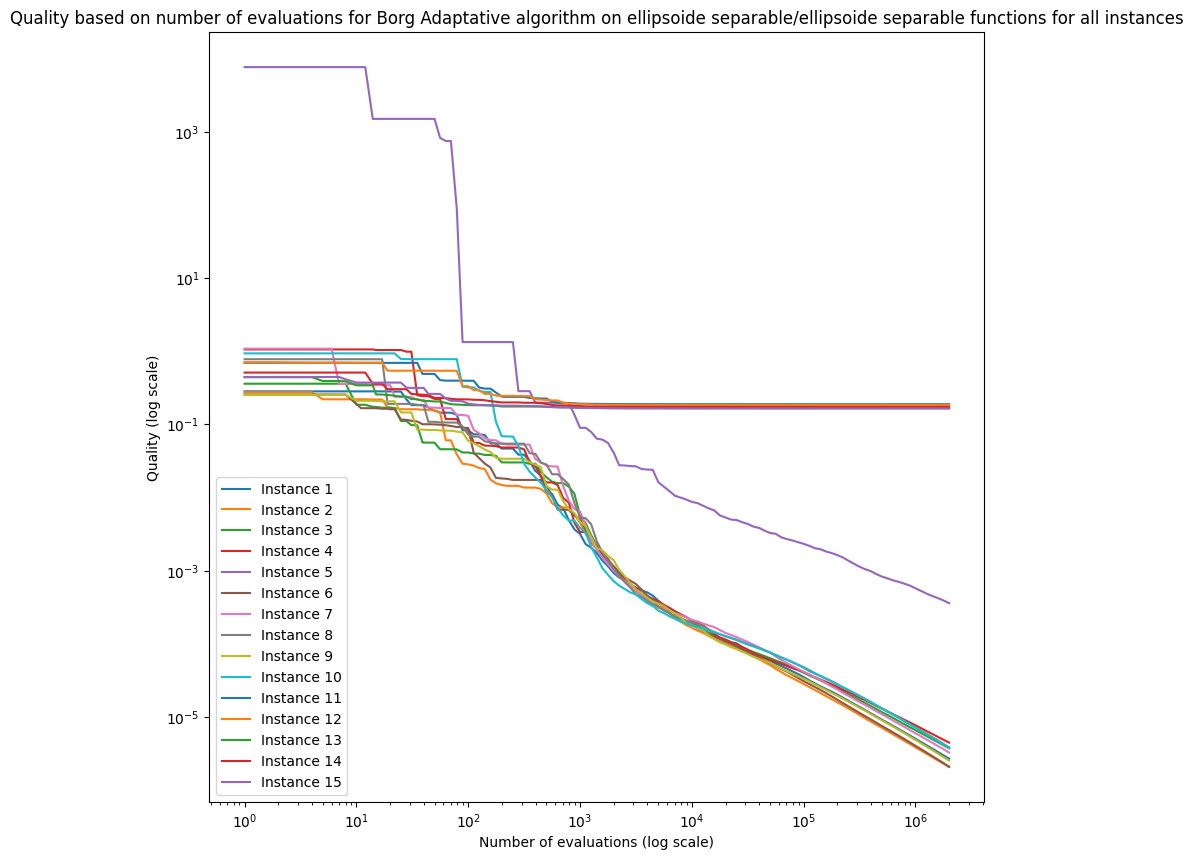

In [59]:
# Plot the data
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title("Quality based on number of evaluations for " + name + " algorithm on " + type + " functions for all instances")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
for i, instance in enumerate(instances):
    ax.plot(list(instance.keys()), list(instance.values()), label=f"Instance {i+1}")
ax.plot()
ax.legend(loc='lower left')
plt.show()

In [60]:
# convert to numpy
for i, instance in enumerate(instances):
    instances[i] = np.array(list(instance.items()))

In [61]:
# Do the median
median = {}
for instance in instances:
    for x, y in instance:
        if x not in median:
            median[x] = []
        median[x].append(y)
for x in median:
    median[x] = np.median(median[x])

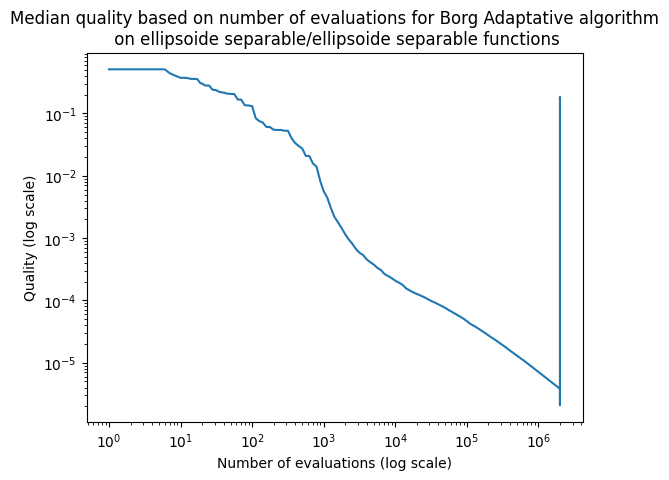

In [62]:
# Plot the medians
fig, ax = plt.subplots()
ax.set_title("Median quality based on number of evaluations for " + name + " algorithm\n on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(median.keys()), list(median.values()), label="Median")
plt.show()

In [63]:
# Ecart type
std = {}
for instance in instances:
    for x, y in instance:
        if x not in std:
            std[x] = []
        std[x].append(y)
for x in std:
    std[x] = np.std(std[x])

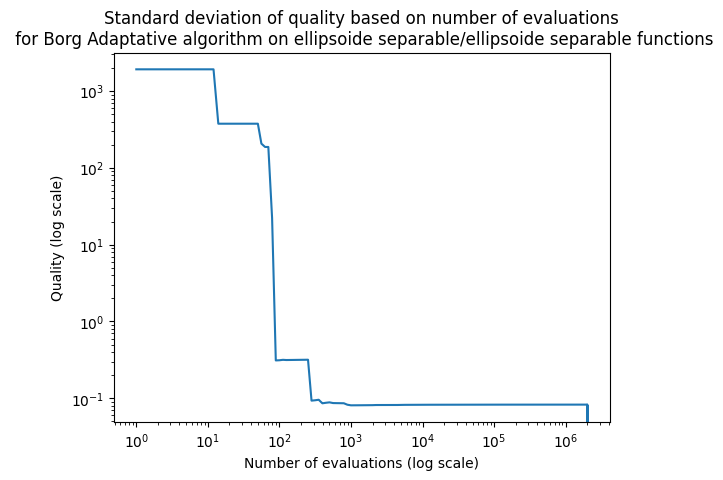

In [64]:
# Plot the standard deviation
fig, ax = plt.subplots()
ax.set_title("Standard deviation of quality based on number of evaluations\n for " + name + " algorithm on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(std.keys()), list(std.values()), label="Standard deviation")
plt.show()

In [65]:
# ECDF
sample = np.hstack(instances)
ecdf = ECDF(sample[:, 1])

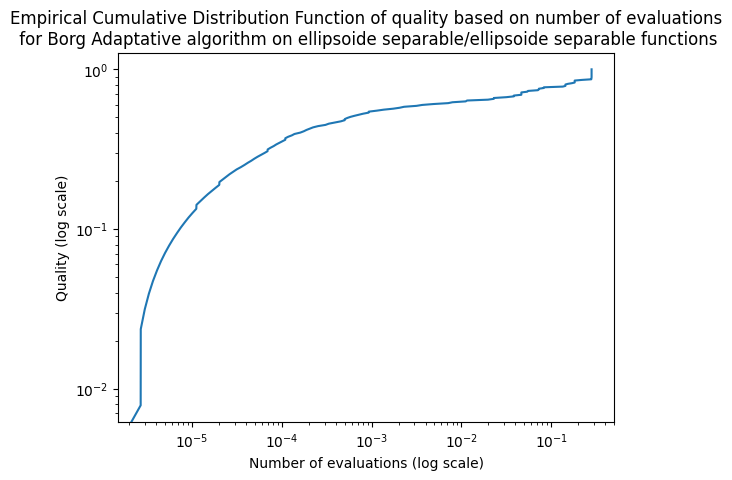

In [66]:
# Plot the ECDF
fig, ax = plt.subplots()
ax.set_title("Empirical Cumulative Distribution Function of quality based on number of evaluations\n for " + name + " algorithm on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(ecdf.x, ecdf.y, label="ECDF")
plt.show()